In [1]:
using DifferentialEquations

## Define the ThreeBody Problem
const threebody_μ = parse(Float64,"0.012277471"); const threebody_μ′ = 1 - threebody_μ

f = (t,u,du) -> begin
  # 1 = y₁
  # 2 = y₂
  # 3 = y₁'
  # 4 = y₂'
  D₁ = ((u[1]+threebody_μ)^2 + u[2]^2)^(3/2)
  D₂ = ((u[1]-threebody_μ′)^2 + u[2]^2)^(3/2)
  du[1] = u[3]
  du[2] = u[4]
  du[3] = u[1] + 2u[4] - threebody_μ′*(u[1]+threebody_μ)/D₁ - threebody_μ*(u[1]-threebody_μ′)/D₂
  du[4] = u[2] - 2u[3] - threebody_μ′*u[2]/D₁ - threebody_μ*u[2]/D₂
end

prob = ODEProblem(f,[0.994, 0.0, 0.0, parse(Float64,"-2.00158510637908252240537862224")])

t₀ = 0.0; T = parse(Float64,"17.0652165601579625588917206249")

tspan = [t₀,T]
tspan2 = [t₀,2T]
abstols = 1./10.^(3:13)
reltols = 1./10.^(0:10);

### 5th Order Runge-Kutta Methods

#### No full save

[DifferentialEquations.jl] Initializing backend: ODEInterface


INFO: Recompiling stale cache file /home/crackauc/.julia/lib/v0.6/PyPlot.ji for module PyPlot.
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in transpose(::String) at ./deprecated.jl:768
 in ctranspose at ./operators.jl:534 [inlined]
 in (::Base.##211#212)(::Tuple{Int64,String}) at ./<missing>:0
 in copy!(::Array{String,2}, ::Base.Generator{Base.Prod2{Base.OneTo{Int64},Array{String,1}},Base.##211#212}) at ./abstractarray.jl:493
 in _collect(::Type{String}, ::Base.Generator{Base.Prod2{Base.OneTo{Int64},Array{String,1}},Base.##211#212}, ::Base.HasShape) at ./array.jl:277
 in ctranspose(::Array{String,1}) at ./arraymath.jl:447
 in macro expansion at /home/crackauc/.julia/v0.6/DifferentialEquations/src/general/plotrecipes.jl:175 [inlined]
 in apply_recipe(::Dict{Symbol,Any}, ::DifferentialEquations.WorkPrecisionSet) at /home/crackauc/.julia/v0.6/RecipesBase/src/RecipesBase.jl:238
 in _process_userrecipes(::Plots.Plot{Plots.PyPlotBackend}, ::Dict{Symbol,Any}, ::Tuple{DifferentialEq


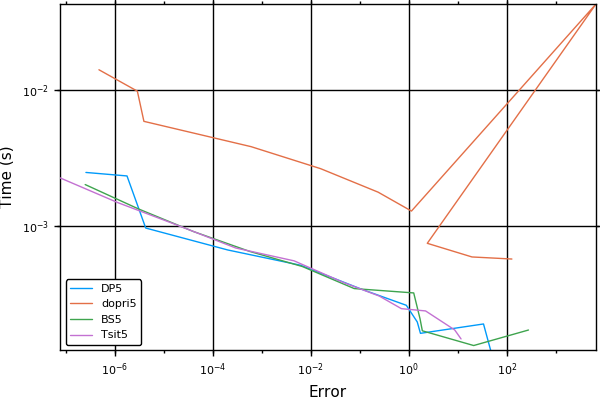

In [2]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:dopri5)
          #Dict(:alg=>:ode45)
          Dict(:alg=>:BS5)
          Dict(:alg=>:Tsit5)];
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;endsol=prob.u₀,β=0.04,expo1=.17,qmin=0.2,qmax=10.0,fullnormalize=false,dense=false,save_timeseries=false,numruns=100)
plot(wp)

#### Full save, but no dense

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in abs(::Array{Float64,1}) at ./deprecated.jl:50
 in py_compute_axis_minval(::Plots.Axis) at /home/crackauc/.julia/v0.6/Plots/src/backends/pyplot.jl:886
 in py_set_scale(::PyCall.PyObject, ::Plots.Axis) at /home/crackauc/.julia/v0.6/Plots/src/backends/pyplot.jl:914
 in _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at /home/crackauc/.julia/v0.6/Plots/src/backends/pyplot.jl:1002
 in prepare_output(::Plots.Plot{Plots.PyPlotBackend}) at /home/crackauc/.julia/v0.6/Plots/src/plot.jl:232
 in show(::Base64EncodePipe, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at /home/crackauc/.julia/v0.6/Plots/src/output.jl:170
 in base64encode(::Function, ::MIME{Symbol("image/png")}, ::Vararg{Any,N}) at ./base64.jl:177
 in show(::Base.AbstractIOBuffer{Array{UInt8,1}}, ::MIME{Symbol("text/html")}, ::Plots.Plot{Plots.PyPlotBackend}) at /home/crackauc/.julia/v0.6/Plots/src/output.jl:148
 in show(::Base.AbstractIOBuffer{Array{U


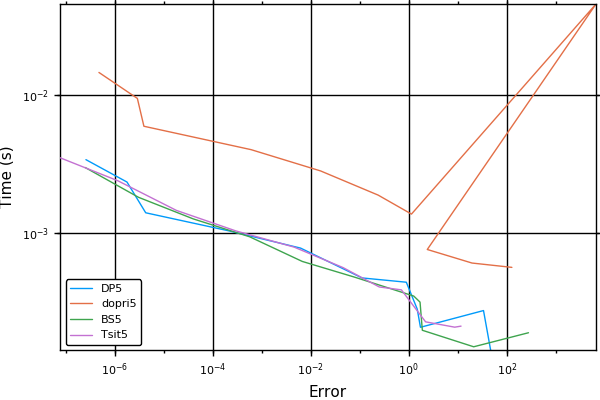

In [3]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:dopri5)
          #Dict(:alg=>:ode45)
          Dict(:alg=>:BS5)
          Dict(:alg=>:Tsit5)];
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;endsol=prob.u₀,β=0.04,expo1=.17,qmin=0.2,qmax=10.0,fullnormalize=false,dense=false,numruns=100)
plot(wp)

#### Dense


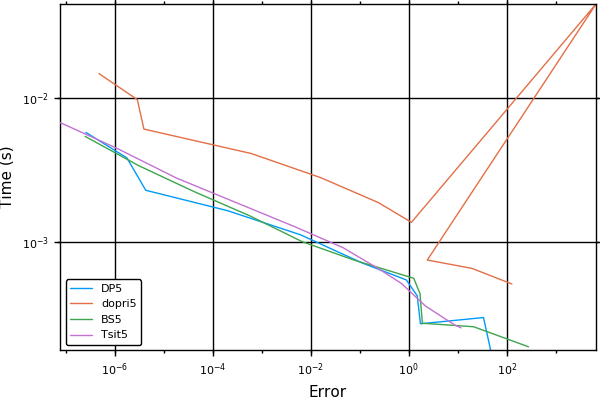

In [4]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:dopri5)
          #Dict(:alg=>:ode45)
          Dict(:alg=>:BS5)
          Dict(:alg=>:Tsit5)];
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;endsol=prob.u₀,β=0.04,expo1=.17,qmin=0.2,qmax=10.0,fullnormalize=false,numruns=100)
plot(wp)

In these tests we see that most of the algorithms are close,with `BS5` and `DP5` showing much better than `Tsit5`. `ode45` errors.

### Higher Order Algorithms


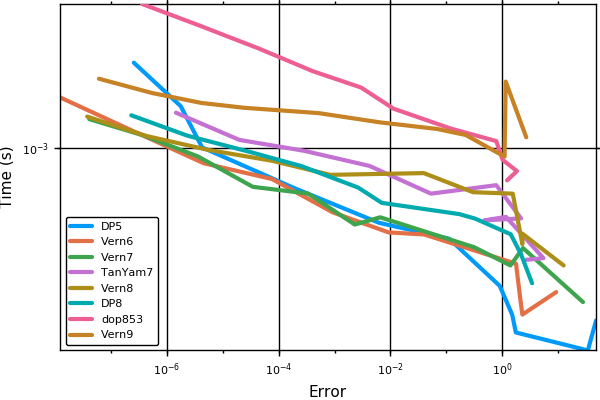

In [5]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:Vern6)
          Dict(:alg=>:Vern7)
          Dict(:alg=>:TanYam7)
          Dict(:alg=>:Vern8)
          Dict(:alg=>:DP8)
          Dict(:alg=>:dop853)
          Dict(:alg=>:Vern9)];
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;endsol=prob.u₀,β=0.04,expo1=.17,qmin=0.2,qmax=10.0,fullnormalize=false,dense=false,save_timeseries=false,numruns=100)
plot(wp,lw=3)


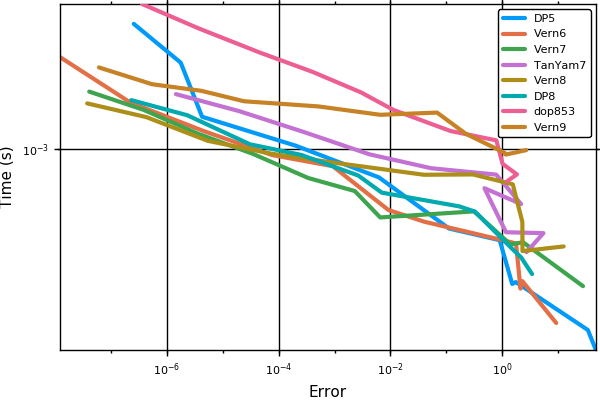

In [6]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:Vern6)
          Dict(:alg=>:Vern7)
          Dict(:alg=>:TanYam7)
          Dict(:alg=>:Vern8)
          Dict(:alg=>:DP8)
          Dict(:alg=>:dop853)
          Dict(:alg=>:Vern9)];
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;endsol=prob.u₀,β=0.04,expo1=.17,qmin=0.2,qmax=10.0,fullnormalize=false,dense=false,numruns=100)
plot(wp,lw=3)


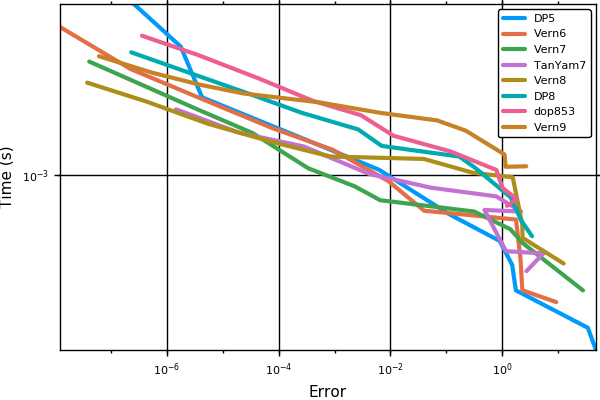

In [7]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:Vern6)
          Dict(:alg=>:Vern7)
          Dict(:alg=>:TanYam7)
          Dict(:alg=>:Vern8)
          Dict(:alg=>:DP8)
          Dict(:alg=>:dop853)
          Dict(:alg=>:Vern9)];
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;endsol=prob.u₀,β=0.04,expo1=.17,qmin=0.2,qmax=10.0,fullnormalize=false,numruns=100)
plot(wp,lw=3)

In this test we see `:Vern6` and `:Vern7` shine.

### Other Algorithms

[DifferentialEquations.jl] Initializing backend: Sundials


INFO: Precompiling module Sundials.



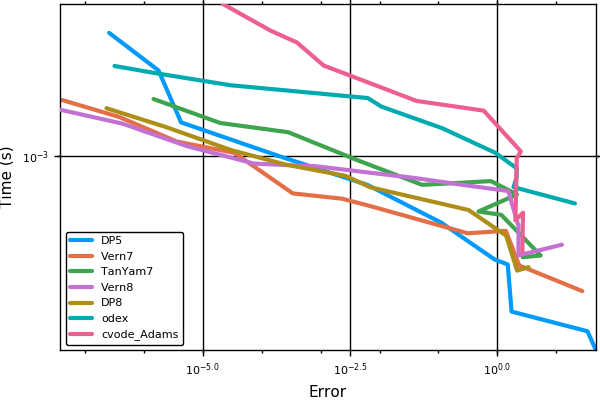

In [8]:
setups = [Dict(:alg=>:DP5)
          Dict(:alg=>:Vern7)
          Dict(:alg=>:TanYam7)
          Dict(:alg=>:Vern8)
          Dict(:alg=>:DP8)
          Dict(:alg=>:odex)
          Dict(:alg=>:cvode_Adams)
    ];
wp = ode_workprecision_set(prob,tspan,abstols,reltols,setups;endsol=prob.u₀,β=0.04,expo1=.17,qmin=0.2,qmax=10.0,fullnormalize=false,dense=false,numruns=100)
plot(wp,lw=3)

### Conclusion

As in the other tests, the DifferentialEquations.jl algorithms with the Verner Efficient methods are the most efficient solvers at stringent tolerances, while the order 5 methods do well at cruder tolerances.